### Logistic Regression for Multiclass Classification

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples = 1000, n_features = 10,n_informative = 3, n_classes = 3,random_state=  15)

In [5]:
X

array([[-1.28613186, -0.64833414,  1.04411477, ..., -1.3164116 ,
         1.01191003, -0.89806282],
       [-0.22222406,  2.083232  ,  1.19111402, ...,  0.98140271,
        -1.62879759,  1.37759419],
       [-0.43196264,  0.37574543, -1.37033375, ...,  1.2926021 ,
         0.925545  ,  0.23270542],
       ...,
       [-0.16384636, -0.41072503,  0.73908587, ...,  0.55830515,
         1.08971786, -0.26627295],
       [ 1.74969059, -1.12416838,  0.19980683, ...,  0.75255654,
         0.32229436, -0.17334302],
       [-0.24755583, -1.1705942 , -1.14058569, ...,  0.2063625 ,
         1.84351802, -0.81483138]], shape=(1000, 10))

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30,random_state= 42)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class = 'ovr')

In [8]:
logistic.fit(X_train,y_train)

c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [9]:
y_pred= logistic.predict(X_test)

In [10]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
accuracy_score(y_pred,y_test)

0.79

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [15]:
confusion_matrix(y_pred,y_test)

array([[84,  3, 10],
       [10, 74,  7],
       [ 8, 25, 79]])

### Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(5)

In [21]:
penalty  = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solvers = ['newton-cg','lbfgs','sag','saga','liblinear']
params = dict(penalty = penalty,C = c_values,solver = solvers)


In [22]:
grid = GridSearchCV(estimator = logistic , param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [23]:
grid.fit(X_train,y_train)

c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanni\Desktop\NOTES\Semes

,estimator,LogisticRegre...i_class='ovr')
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [24]:
y_pred_1 = grid.predict(X_test)

In [25]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



## Logistic Regression for Imbalanced Datasets

In [1]:
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples = 10000,n_features = 2,n_clusters_per_class=1,n_redundant=0,weights = [0.99],random_state=10)

In [3]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [4]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [5]:
import seaborn as sns
import pandas as pd

<Axes: xlabel='Feature1', ylabel='Feature2'>

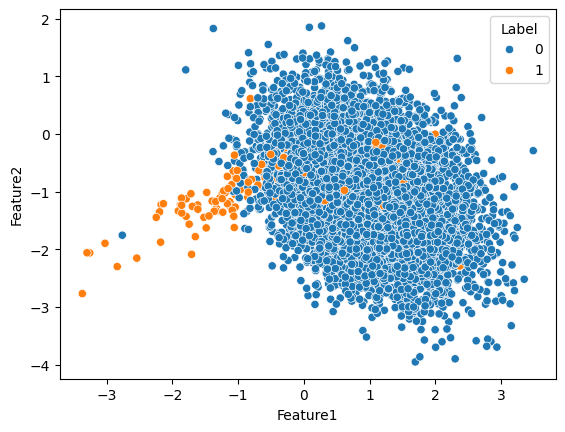

In [15]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Label'] = y

sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Label')


In [8]:
pd.DataFrame(X)[0]

0       1.879910
1       0.377083
2       1.354312
3      -0.509843
4       0.863561
          ...   
9995    1.066698
9996    1.058723
9997    0.995099
9998    1.758594
9999    0.797705
Name: 0, Length: 10000, dtype: float64

In [16]:
from  sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [17]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
penalty  = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solvers = ['newton-cg','lbfgs','sag','saga','liblinear']
class_weight = [{0:w1,1:w2} for w1 in [1,10,50,100] for w2 in [1 , 10 ,50 , 100]]

In [25]:
params = dict(penalty = penalty,C = c_values,solver = solvers,class_weight = class_weight)

In [26]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [27]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model , param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [28]:
grid.fit(X_train,y_train)

c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanni\Desktop\NOTES\Se

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [29]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [30]:
grid.best_score_

np.float64(0.9873333333333333)

In [31]:
y_pred = grid.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
accuracy_score(y_test,y_pred)

0.9916

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2476
           1       0.59      0.42      0.49        24

    accuracy                           0.99      2500
   macro avg       0.79      0.71      0.74      2500
weighted avg       0.99      0.99      0.99      2500



In [35]:
print(confusion_matrix(y_test,y_pred))

[[2469    7]
 [  14   10]]


### Logistic Regression with ROC Curve and ROC AUC Score

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot

In [2]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [4]:
dummy_model = [0 for _ in range(len(y_test))]

In [5]:
model = LogisticRegression()

In [6]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
model_prob = model.predict_proba(X_test)

In [8]:
model_prob = model_prob[:,1]

In [9]:
dummy_model_auc = roc_auc_score(y_test,dummy_model)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9232456140350878


In [10]:
dummy_fpr , dummy_tpr ,_= roc_curve(y_test,dummy_model)
model_fpr , model_tpr ,thresholds= roc_curve(y_test,model_prob)

In [11]:
thresholds

array([           inf, 9.99553764e-01, 9.39496987e-01, 9.36732025e-01,
       9.13252414e-01, 9.09991853e-01, 8.95270782e-01, 8.95036262e-01,
       8.69913569e-01, 8.66043844e-01, 8.57581727e-01, 8.48810315e-01,
       8.45140783e-01, 8.42623874e-01, 8.03371057e-01, 8.01282475e-01,
       7.89459343e-01, 7.76579862e-01, 7.28221281e-01, 7.13478526e-01,
       6.01507440e-01, 5.82911698e-01, 5.14429540e-01, 5.04637901e-01,
       5.03669367e-01, 5.03073298e-01, 4.69001994e-01, 4.63040656e-01,
       4.56979367e-01, 4.55023943e-01, 4.50531614e-01, 4.36245243e-01,
       4.35056210e-01, 4.19808622e-01, 4.14620476e-01, 4.10995319e-01,
       3.90139627e-01, 3.66392184e-01, 3.62088932e-01, 2.97027861e-01,
       2.81723864e-01, 2.71874667e-01, 2.58848472e-01, 2.32154964e-01,
       2.31693719e-01, 2.30369604e-01, 2.03918182e-01, 1.38454674e-01,
       1.35189789e-01, 1.29272162e-01, 1.28501963e-01, 1.18052536e-01,
       1.16130995e-01, 8.98411999e-02, 8.75397210e-02, 9.23284478e-03,
      

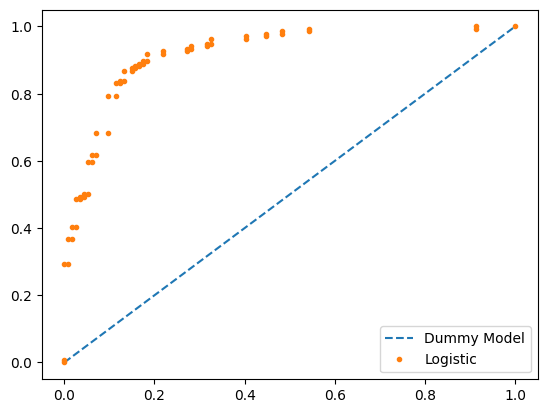

In [12]:
pyplot.plot(dummy_fpr,dummy_tpr,"--",label = 'Dummy Model')
pyplot.plot(model_fpr,model_tpr,".",label = 'Logistic')
pyplot.legend()

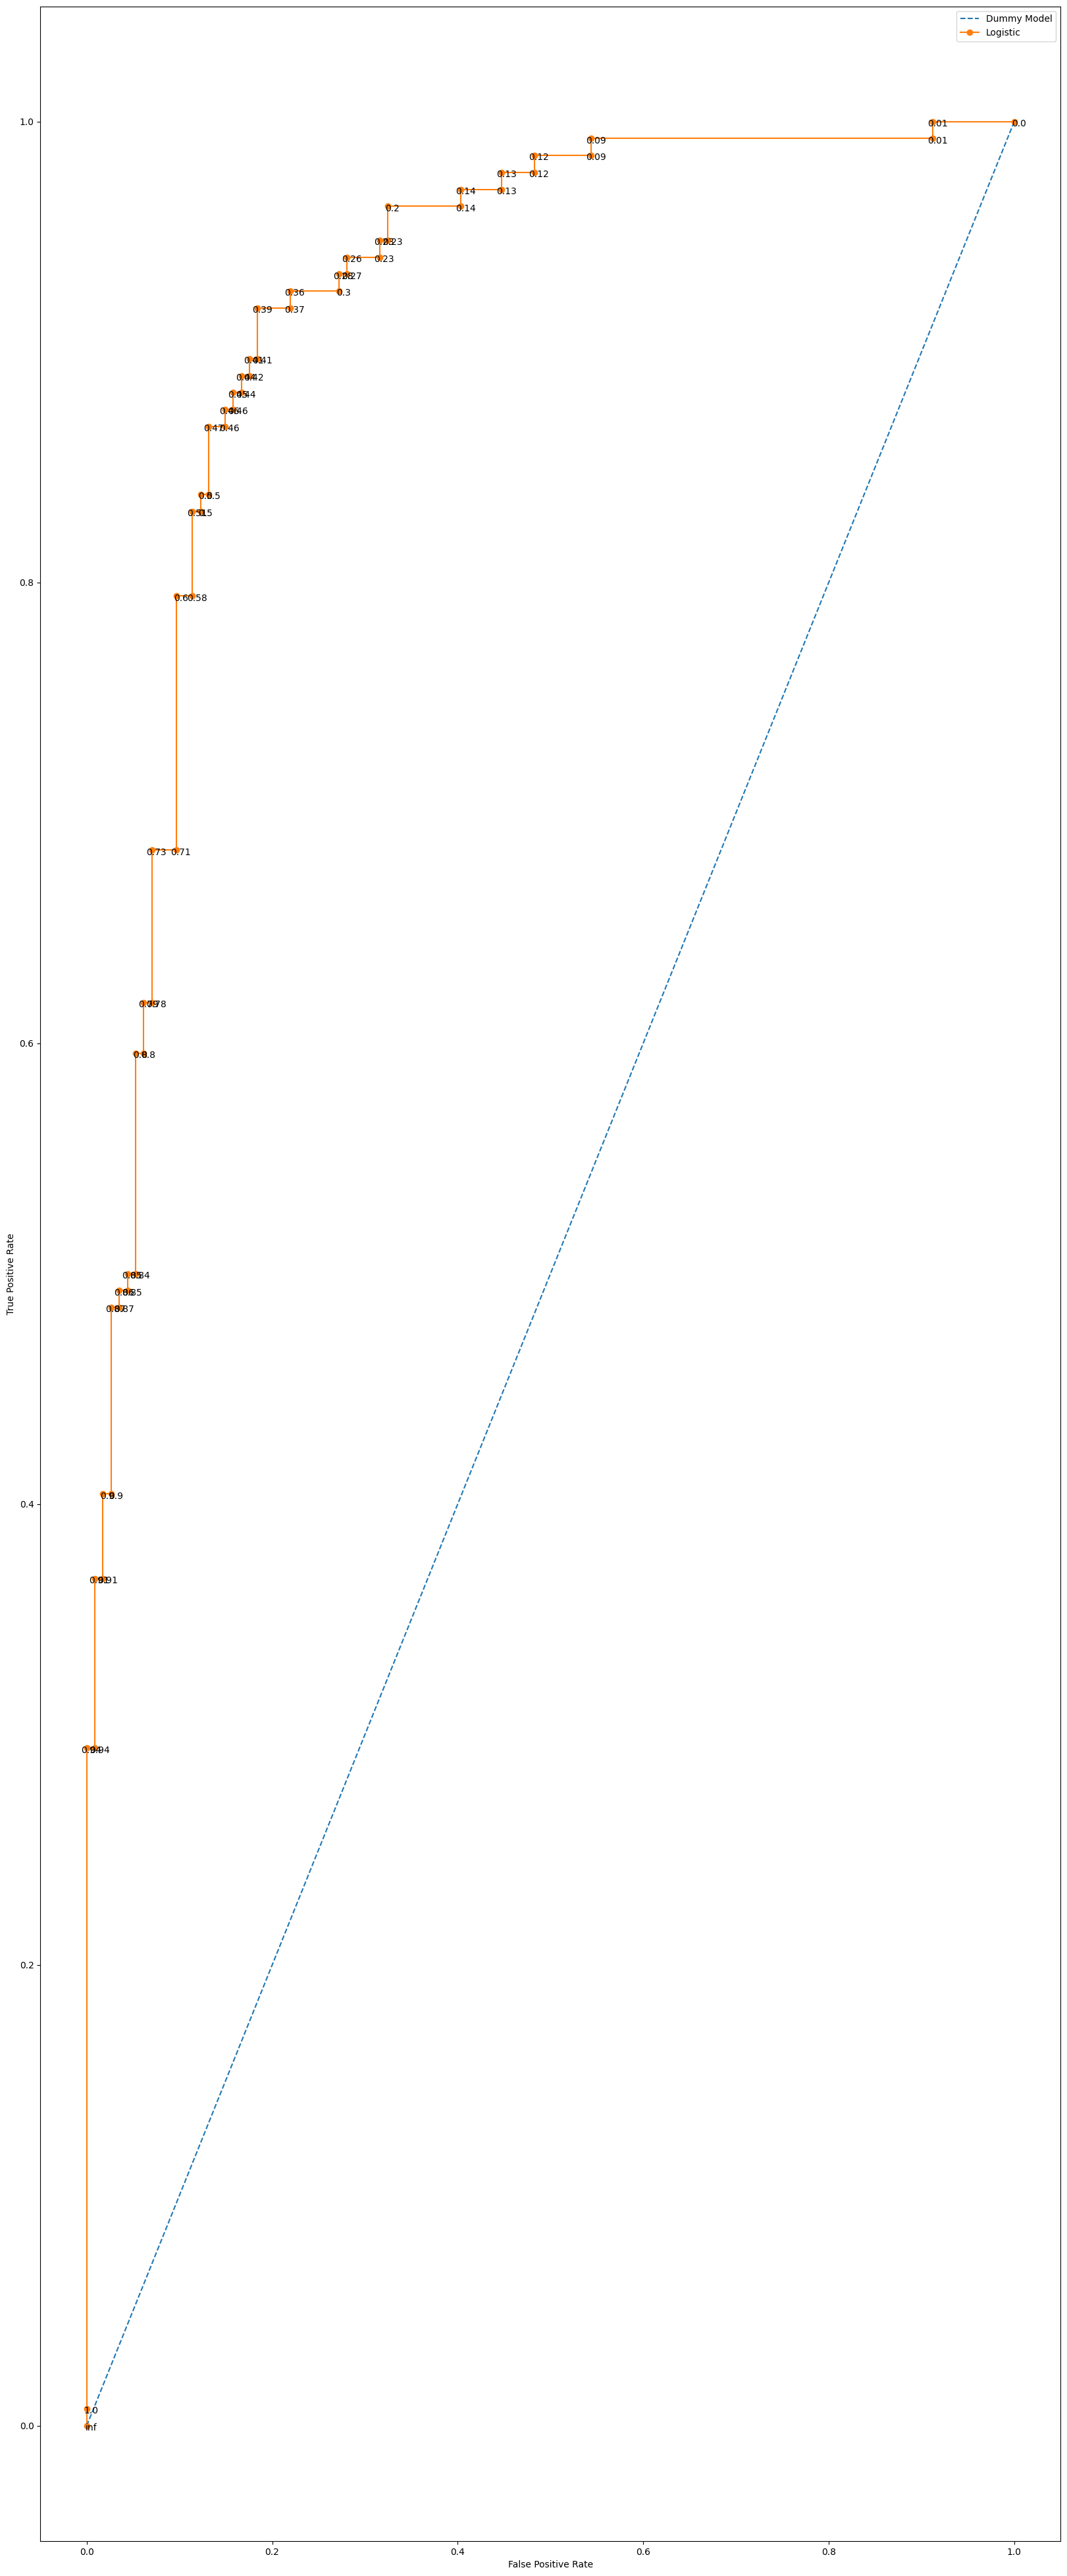

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axis
fig = plt.figure(figsize=(20, 50))
ax = fig.add_subplot(111)

# Plot ROC curves
ax.plot(dummy_fpr, dummy_tpr, '--', label='Dummy Model')         # Dashed line
ax.plot(model_fpr, model_tpr, '-o', label='Logistic')            # Line with circle markers

# Annotate thresholds
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', xy=(fpr, tpr), textcoords="offset points", xytext=(5, -5), ha='center')

# Axis labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show plot
plt.show()